### Info about the data
* Originial File in the form of Sqlite (1.8 Million rows)
* Contains data for Years 1992 - 2015
* We subsetted data from 2011 - 2015 for ease of loading (and github large file constraints)
    * Might have to increase this range considering high missing values of contained date
* Saved data to new file 2011_2015_fires.csv (feel free to subset even further)
* Load ^ for analysis

### Food for thought
* How long does it take for a fire to get controlled? and how does this controlling duration vary by state - _controlling duration_ (new variable?)

In [140]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
## ONLY run this if you need the entire dataset
# conn = sqlite3.connect("data/FPA_FOD_20170508.sqlite")
# fires = pd.read_sql_query("SELECT * FROM fires", conn)

In [141]:
# read the subset data
fires = pd.read_csv('data/2011_2015_fires.csv')

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (13,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Missing Values

In [162]:
missing_percentage = []
for column in fires.columns:
    missing_percentage.append(str(int(fires[column].isna().sum()/len(fires[column])*100)) + "% missing in "+ column)
missing_percentage.sort()
missing_percentage

['0% missing in DISCOVERY_DATE',
 '0% missing in DISCOVERY_DOY',
 '0% missing in FIRE_SIZE',
 '0% missing in FIRE_SIZE_CLASS',
 '0% missing in FIRE_YEAR',
 '0% missing in FOD_ID',
 '0% missing in FPA_ID',
 '0% missing in LATITUDE',
 '0% missing in LONGITUDE',
 '0% missing in NWCG_REPORTING_AGENCY',
 '0% missing in NWCG_REPORTING_UNIT_ID',
 '0% missing in NWCG_REPORTING_UNIT_NAME',
 '0% missing in OBJECTID',
 '0% missing in OWNER_CODE',
 '0% missing in OWNER_DESCR',
 '0% missing in SOURCE_REPORTING_UNIT',
 '0% missing in SOURCE_REPORTING_UNIT_NAME',
 '0% missing in SOURCE_SYSTEM',
 '0% missing in SOURCE_SYSTEM_TYPE',
 '0% missing in STATE',
 '0% missing in STAT_CAUSE_CODE',
 '0% missing in STAT_CAUSE_DESCR',
 '0% missing in Shape',
 '0% missing in Unnamed: 0',
 '0% missing in index',
 '14% missing in COUNTY',
 '14% missing in FIPS_CODE',
 '14% missing in FIPS_NAME',
 '14% missing in LOCAL_INCIDENT_ID',
 '21% missing in DISCOVERY_TIME',
 '21% missing in FIRE_NAME',
 '23% missing in CONT_

## Describing missing values
* 23% missing values in Date and Day of year of fire containment (controlled) - (COUNNT_DATE, COUNT_DOY)
    * Could be used to calculate the duration of time spent controlling the fire
    * Makes little sense to add random values (mean, ffil, bfill) since its Date
    * Removing the Na rows would be appropriate considering we have a large set of data
* 30% missing in Time of containment
    * No big reason to add Time in our analysis yet.
    * Could leave like this or remove the entire column
    * Removing rows would cause unnecessary loss of data
* \> 50% missing in 7 columns (listed above)
    * None of the columns have much significance to the analysis
    * Dropping 7 columns (below)

In [177]:
# Remove redundant columns with high missing values
fires.drop(columns=['LOCAL_FIRE_REPORT_ID', 'FIRE_CODE', 'MTBS_ID', 'MTBS_FIRE_NAME', 
                    'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'COMPLEX_NAME'])

,Unnamed: 0,index,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,1453964,1453965,20020059,FS-1496314,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,...,A,60.246389,-149.349444,13.0,STATE OR PRIVATE,AK,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x0042\x1b\xa6.\xabb\xc0...
1,1,1453965,1453966,20020060,FS-1496318,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,...,A,60.475833,-149.752500,13.0,STATE OR PRIVATE,AK,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\xadG\xe1z\x14\xb8b\...
2,2,1453966,1453967,20020061,FS-1496319,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,...,A,60.514444,-149.467500,13.0,STATE OR PRIVATE,AK,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00(\\\x8f\xc2\xf5\xaeb...
3,3,1453967,1453968,20020062,FS-1496321,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,...,A,60.399722,-149.360833,13.0,STATE OR PRIVATE,AK,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x03\xf5V\xf2\x8b\xa...
4,4,1453968,1453969,20020063,FS-1496322,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,...,A,60.467500,-149.973056,5.0,USFS,AK,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x82\xeciE#\xbfb\xc0...
5,5,1453969,1453970,20020064,FS-1496907,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,...,A,60.515000,-149.702500,5.0,USFS,AK,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x13\xaeG\xe1z\xb6b\...
6,6,1453970,1453971,20020065,FS-1493986,FED,FS-FIRESTAT,FS,USAKTNF,Tongass National Forest,...,A,58.330833,-134.737222,13.0,STATE OR PRIVATE,AK,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x1a\x99\rS\x97\xd7`...
7,7,1453971,1453972,20020066,FS-1498636,FED,FS-FIRESTAT,FS,USAKTNF,Tongass National Forest,...,A,58.362222,-134.507500,13.0,STATE OR PRIVATE,AK,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\n\xd7\xa3p=\xd0`\xc...
8,8,1453972,1453973,20020067,FS-1498645,FED,FS-FIRESTAT,FS,USAKTNF,Tongass National Forest,...,A,56.663889,-132.923056,13.0,STATE OR PRIVATE,AK,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\xe8R\xd0\xab\x89\x9...
9,9,1453973,1453974,20020068,FS-1498620,FED,FS-FIRESTAT,FS,USAKTNF,Tongass National Forest,...,A,58.285556,-134.674444,13.0,STATE OR PRIVATE,AK,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x9a\x98\x81\x0c\x95...


### Further analysis - Distribution of missing contained date and time values
* Texas and California have the maximum number of recorded wildfires AND also the maximum number of missing values
* The missinng value perccentage of contained date and time (though 23% for the entire dataset) rise to 40% in California and 80% in Texas. 
* Should we still delete these rows considering we have a large set of data (1.8 mil in total)

In [187]:
no_time_fires = fires[fires['CONT_TIME'].isnull()]
no_date_fires = fires[fires['CONT_DATE'].isnull()]

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


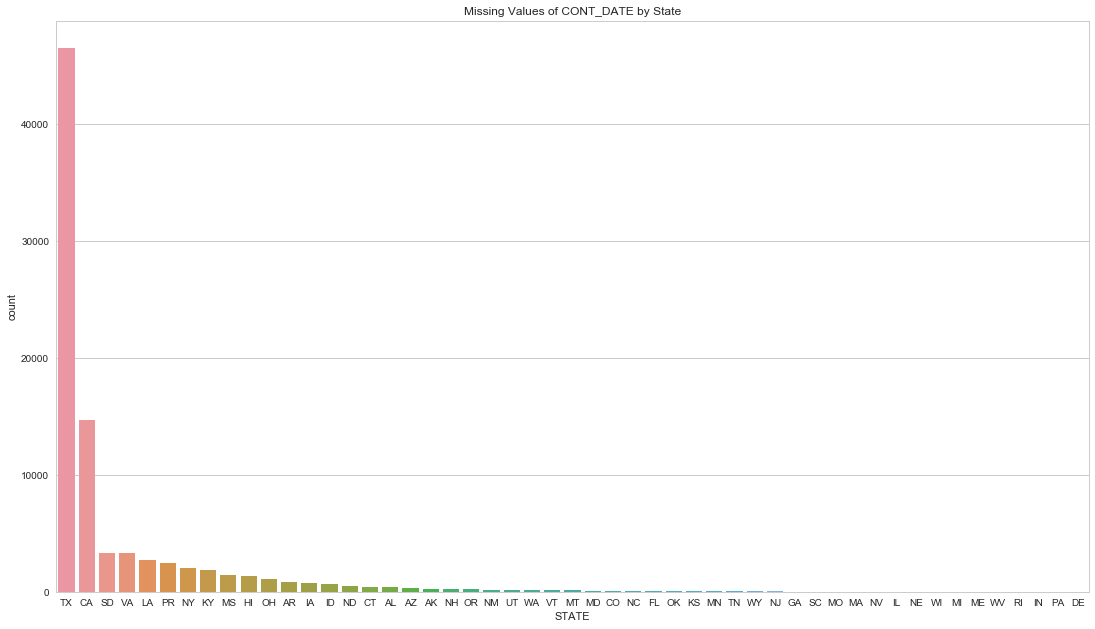

In [193]:
sns.set(style="whitegrid")
g = sns.countplot(pd.Series(no_date_fires.STATE), order = pd.Series(no_date_fires.STATE).value_counts().index).set_title('Missing Values of CONT_DATE by State')
g.figure.set_size_inches(18.5, 10.5)
sns.plt.show()

In [192]:
# Final data here
print("Length of data")
print(len(fires))
print('Columns')
print(fires.columns)
fires.head()
print(fires.FIRE_YEAR.unique())

Length of data
370345
Columns
Index(['Unnamed: 0', 'index', 'OBJECTID', 'FOD_ID', 'FPA_ID',
       'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY',
       'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME',
       'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME',
       'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')
[2011 2012 2013 2014 2015]


### Histogram of total Fire occurances by state

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


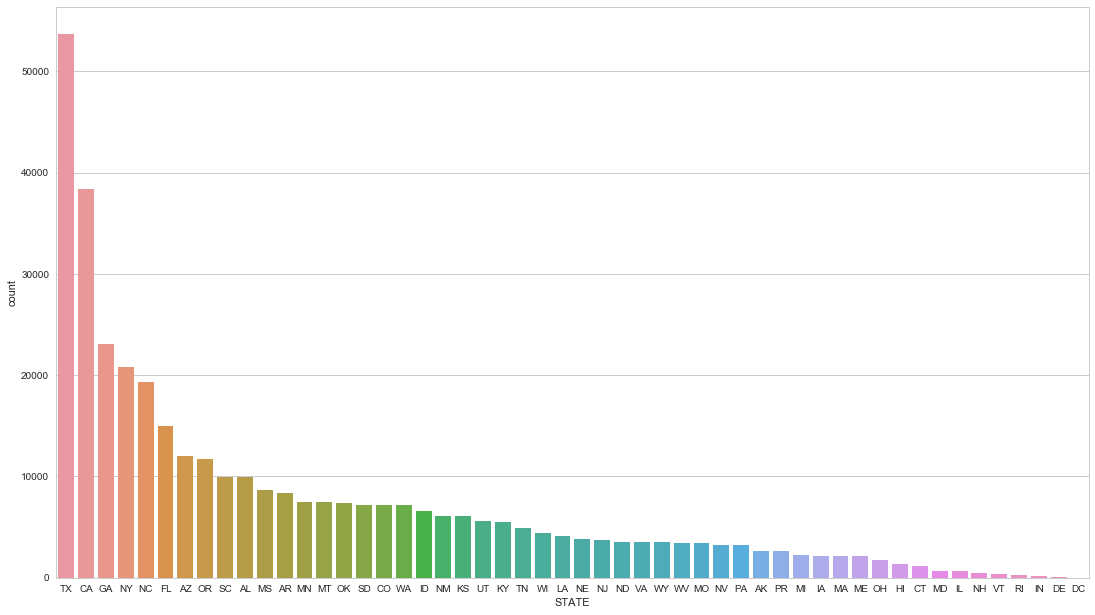

In [125]:

sns.set(style="whitegrid")
g = sns.countplot(pd.Series(fires.STATE), order = pd.Series(fires.STATE).value_counts().index)
g.figure.set_size_inches(18.5, 10.5)
sns.plt.show()

### Mean FIRE_SIZE by State 

In [ ]:
# NOTE : Takes really long to load
# by_state = fires.groupby(['STATE'], as_index=False).mean()
# sns.set(style="whitegrid")
# g = sns.barplot(x="STATE", y="FIRE_SIZE", data=by_state )
# g.figure.set_size_inches(18.5, 10.5)
# sns.plt.show()